In [2]:
import pandas as pd
apps = pd.read_csv('apps.csv')
apps


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
apps.index[-1]

9658

## DATA CLEANING
The price and installs columns contain characters that have to be cleaned and restructured. Using the for loop we replace the character symbols from the dataframe column values. After the charcters are removed, we check the data types of the columns. Since the column mixed input types it was categorized as a object data type


In [4]:
characters_to_remove=['$', '+',',']
columns_to_clean = ['Price', 'Installs']

for char in characters_to_remove:
    for col in columns_to_clean:
        apps[col]= apps[col].apply(lambda x : x.replace(char,''))
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


### Change the Data type for Price and Installs columns


In [5]:
apps['Price'] = apps['Price'].astype(float)

apps['Installs'] = apps['Installs'].astype(float)
print(apps[['Installs','Price']].dtypes)

Installs    float64
Price       float64
dtype: object


## Exploring app categories
We check the number of unique app categories present in our data set and the type of apps categories that are dominating. Here see there are 33 unique categories. From the graph, we see that Family apps have the highest market popularity. 

In [6]:
num_category= len(apps['Category'].unique())
print('number of categories = ',num_category)

number of categories =  33


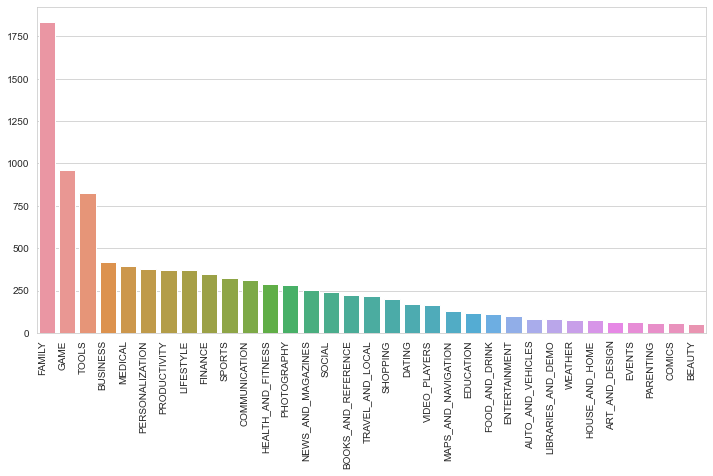

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,6))

num_apps_in_category = apps['Category'].value_counts()
sns.barplot(x=num_apps_in_category.index, y=num_apps_in_category.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


# App rating distribution
Here we explore how the apps perform based on their ratings. The ratings is on a scale of 1 to 5. 
We find out the average rating of apps in all categories is 4.17. The histogram is skewed to the left, which shows that majority of apps are highly rated with a few exceptions in the low rated apps. The kde parameter in the histplot is set to True to show the slope of the distribution.

The average app rating is  4.173243045387998


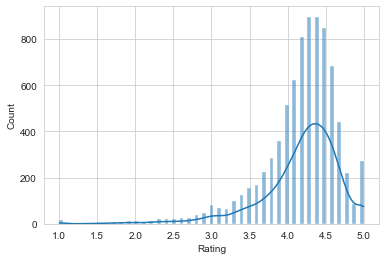

In [11]:
avg_app_rating= apps['Rating'].mean()
print('The average app rating is ', avg_app_rating)
sns.histplot(x='Rating', data = apps, kde=True)

plt.show()